In [1]:
pip install lightgbm


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('merged_file.csv')

In [4]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [5]:
# Check for remaining NaN values
nan_count = data.isna().sum().sum()
print(f"Total NaN values: {nan_count}")

Total NaN values: 99401


In [6]:
data.fillna(method='bfill', inplace=True)

In [7]:
# Check the number of NaN values
print("Number of NaN values in the dataset:")
print(data.isnull().sum())

Number of NaN values in the dataset:
Heat pump heating water supply temperature             0
Roof Top Unit * supply air temperature setpoint_001    0
Roof Top Unit * supply air temperature setpoint_002    0
Roof Top Unit * supply air temperature setpoint_003    0
Roof Top Unit * supply air temperature setpoint_004    0
                                                      ..
Zone temperature of exterior zone068                   0
Zone temperature of exterior zone069                   0
Zone temperature of exterior zone070                   0
Zone temperature of exterior zone071                   0
Zone temperature of exterior zone072                   0
Length: 114, dtype: int64


In [8]:
# Split the data into features (X) and target (y)
X = data.drop(['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
               'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
               'Heating Ventilation and Air Conditioning load for the North Wing'], axis=1)

In [9]:
# Define a list of target variables
target_columns = ['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
                   'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
                   'Heating Ventilation and Air Conditioning load for the North Wing']

In [10]:
# Use a fixed split technique (80% train, 10% validation, 10% test)
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))
test_size = len(X) - train_size - val_size

In [11]:
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
data_train, data_val, data_test = data.iloc[:train_size], data.iloc[train_size:train_size + val_size], data.iloc[train_size + val_size:]


In [12]:
# Initialize dictionaries to store metrics
mse_scores = {}
rmse_scores = {}
mae_scores = {}
r2_scores = {}


In [13]:
# Initialize dictionaries to store models
lgb_train_models = {}
lgb_val_models = {}
lgb_test_models = {}


In [14]:
# Train and evaluate LightGBM models
for target_column in target_columns:
    y_train = data_train[target_column]
    y_val = data_val[target_column]
    y_test = data_test[target_column]

    # Initialize the LightGBM model
    lgb_model = lgb.LGBMRegressor()

    # Train the model on the training data
    lgb_model.fit(X_train, y_train)

    # Make predictions on training, validation, and test sets
    lgb_train_predictions = lgb_model.predict(X_train)
    lgb_val_predictions = lgb_model.predict(X_val)
    lgb_test_predictions = lgb_model.predict(X_test)

    # Calculate RMSE for each set
    lgb_train_rmse = np.sqrt(mean_squared_error(y_train, lgb_train_predictions))
    lgb_val_rmse = np.sqrt(mean_squared_error(y_val, lgb_val_predictions))
    lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_predictions))

    print(f"LightGBM RMSE for {target_column} (Train): {lgb_train_rmse}")
    print(f"LightGBM RMSE for {target_column} (Validation): {lgb_val_rmse}")
    print(f"LightGBM RMSE for {target_column} (Test): {lgb_test_rmse}")

    # Store the trained models
    lgb_train_models[target_column] = lgb_model
    lgb_val_models[target_column] = lgb_model
    lgb_test_models[target_column] = lgb_model

    # Calculate and store metrics
    mse_scores[target_column] = {
        'Train': mean_squared_error(y_train, lgb_train_predictions),
        'Validation': mean_squared_error(y_val, lgb_val_predictions),
        'Test': mean_squared_error(y_test, lgb_test_predictions)
    }
    rmse_scores[target_column] = {
        'Train': lgb_train_rmse,
        'Validation': lgb_val_rmse,
        'Test': lgb_test_rmse
    }
    mae_scores[target_column] = {
        'Train': mean_absolute_error(y_train, lgb_train_predictions),
        'Validation': mean_absolute_error(y_val, lgb_val_predictions),
        'Test': mean_absolute_error(y_test, lgb_test_predictions)
    }
    r2_scores[target_column] = {
        'Train': r2_score(y_train, lgb_train_predictions),
        'Validation': r2_score(y_val, lgb_val_predictions),
        'Test': r2_score(y_test, lgb_test_predictions)
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.262637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23544
[LightGBM] [Info] Number of data points in the train set: 51737, number of used features: 106
[LightGBM] [Info] Start training from score 3.434632


KeyboardInterrupt: 

In [ ]:
# Print average metrics over all target variables
print("Average Metrics over All Target Variables (Train):")
for key, value in mse_scores.items():
    print(f"{key}:

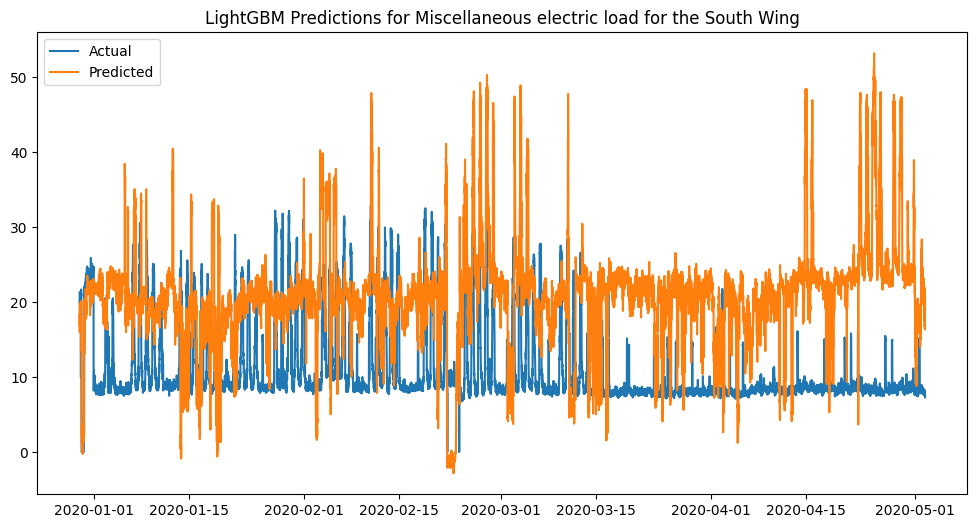

In [ ]:
# Visualize results for one of the models
plt.figure(figsize=(12, 6))
plt.title('LightGBM Predictions for Miscellaneous electric load for the South Wing')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, lgb_predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize dictionaries to store metrics for each model
mse_scores = {}
rmse_scores = {}
mae_scores = {}
r2_scores = {}

In [ ]:
# Iterate through the target columns and evaluate each model
for target_column in target_columns:
    y_test = data[target_column][train_size:]
    lgb_model = lgb_models[target_column]
    lgb_predictions = lgb_model.predict(X_test)

    # Calculate and store metrics
    mse = mean_squared_error(y_test, lgb_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, lgb_predictions)
    r2 = r2_score(y_test, lgb_predictions)

    mse_scores[target_column] = mse
    rmse_scores[target_column] = rmse
    mae_scores[target_column] = mae
    r2_scores[target_column] = r2

    # Print metrics for each target variable
    print(f"Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared (R2): {r2}")
    print()


Metrics for Miscellaneous electric load for the South Wing:
Mean Squared Error: 6.487167046091967
Root Mean Squared Error: 2.5469917640408593
Mean Absolute Error: 2.00149311434423
R-squared (R2): 0.08142926694744712

Metrics for Miscellaneous electric load for the North Wing:
Mean Squared Error: 76.70816356910869
Root Mean Squared Error: 8.758319677261655
Mean Absolute Error: 8.294110631566447
R-squared (R2): -14.067790404246932

Metrics for Lighting load for the South Wing:
Mean Squared Error: 2.968891899982316
Root Mean Squared Error: 1.7230472715460583
Mean Absolute Error: 1.3505321764246785
R-squared (R2): -0.30833377583544563

Metrics for Heating Ventilation and Air Conditioning load for the South Wing:
Mean Squared Error: 104.92796854182863
Root Mean Squared Error: 10.243435387692385
Mean Absolute Error: 8.763404529932128
R-squared (R2): -0.5708192599571866

Metrics for Heating Ventilation and Air Conditioning load for the North Wing:
Mean Squared Error: 174.94815305547812
Root M

In [ ]:
# Print average metrics over all target variables
print("Average Metrics over All Target Variables:")
print(f"Average MSE: {np.mean(list(mse_scores.values()))}")
print(f"Average RMSE: {np.mean(list(rmse_scores.values()))}")
print(f"Average MAE: {np.mean(list(mae_scores.values()))}")
print(f"Average R2: {np.mean(list(r2_scores.values()))}")# Print average metrics over all target variables
print("Average Metrics over All Target Variables:")
print(f"Average MSE: {np.mean(list(mse_scores.values()))}")
print(f"Average RMSE: {np.mean(list(rmse_scores.values()))}")
print(f"Average MAE: {np.mean(list(mae_scores.values()))}")
print(f"Average R2: {np.mean(list(r2_scores.values()))}")

Average Metrics over All Target Variables:
Average MSE: 73.20806882249795
Average RMSE: 7.299718176078402
Average MAE: 6.4204533625926885
Average R2: -4.0700785575529395
Average Metrics over All Target Variables:
Average MSE: 73.20806882249795
Average RMSE: 7.299718176078402
Average MAE: 6.4204533625926885
Average R2: -4.0700785575529395
